# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset::https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

Import the necessary libraries and create your dataframe(s).

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from scipy.stats import zscore


diabetes_df = pd.read_csv("C:/Users/Subhashini/SubhaGitJuputer/Gcheckpoint1/diabetes.csv")

# Check data frame works
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
diabetes_df.shape

(768, 9)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [5]:
# I can read the missing data percentage list more easily, so I am going to use that technique to look for missing data.sephor
for col in diabetes_df.columns:
    pct_missing = np.mean(diabetes_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
    
# There is no missing data, so I do not need to do anything further for this section.


Pregnancies - 0%
Glucose - 0%
BloodPressure - 0%
SkinThickness - 0%
Insulin - 0%
BMI - 0%
DiabetesPedigreeFunction - 0%
Age - 0%
Outcome - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1        

In [29]:
# # Replace outliers with the median value of the respective column:

diabetes_df['Glucose']= diabetes_df['Glucose'].replace(0,diabetes_df['Glucose'].mean())
print(diabetes_df['Glucose'])
diabetes_df['BloodPressure']= diabetes_df['BloodPressure'].replace(0,diabetes_df['BloodPressure'].mean())
print(diabetes_df['BloodPressure'])
diabetes_df['SkinThickness']= diabetes_df['SkinThickness'].replace(0,diabetes_df['SkinThickness'].mean())
print(diabetes_df['SkinThickness'])
diabetes_df['Insulin']= diabetes_df['Insulin'].replace(0,diabetes_df['Insulin'].mean())
print(diabetes_df['Insulin'])
diabetes_df['BMI']= diabetes_df['BMI'].replace(0,diabetes_df['BMI'].mean())
print(diabetes_df['BMI'])



0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.000000
1      29.000000
2      20.536458
3      23.000000
4      35.000000
         ...    
763    48.000000
764    27.000000
765    23.000000
766    20.536458
767    31.000000
Name: SkinThickness, Length: 768, dtype: float64
0       79.799479
1       79.799479
2       79.799479
3       94.000000
4      168.000000
          ...    
763    180.000000
764     79.799479
765    112.000000
766     79.799479
767     79.799479
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, 

In [30]:
# Detecting outliers using z-score
z_scores = np.abs((diabetes_df - diabetes_df.mean()) / diabetes_df.std())
outlier_threshold = 3
outliers = diabetes_df[z_scores > outlier_threshold]
print("Outliers:")
print(diabetes_df.loc[outliers.index])

print(diabetes_df)

Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                  

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

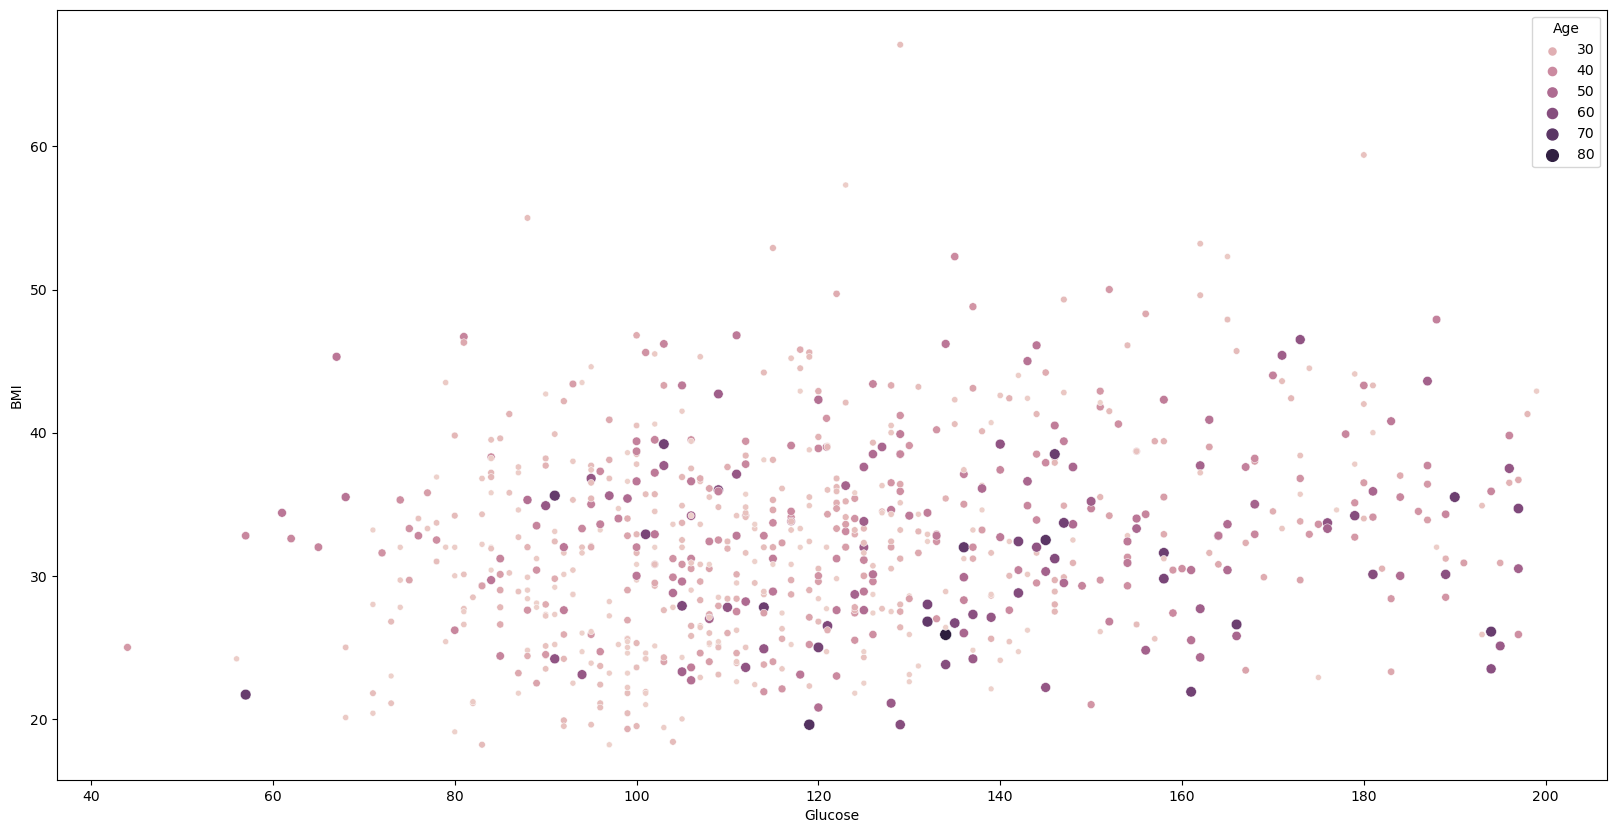

In [38]:
# outliers Glucose VS BMI VS Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=diabetes_df,
               x="Glucose", y="BMI", hue="Age",
               size="Age")

In [31]:
# Print the entire DataFrame
print(diabetes_df.to_string())

     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin        BMI  DiabetesPedigreeFunction  Age  Outcome
0              6  148.000000      72.000000      35.000000   79.799479  33.600000                     0.627   50        1
1              1   85.000000      66.000000      29.000000   79.799479  26.600000                     0.351   31        0
2              8  183.000000      64.000000      20.536458   79.799479  23.300000                     0.672   32        1
3              1   89.000000      66.000000      23.000000   94.000000  28.100000                     0.167   21        0
4              0  137.000000      40.000000      35.000000  168.000000  43.100000                     2.288   33        1
5              5  116.000000      74.000000      20.536458   79.799479  25.600000                     0.201   30        0
6              3   78.000000      50.000000      32.000000   88.000000  31.000000                     0.248   26        1
7             10  115.00

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
Based on my exploratory data analysis (EDA), I did not identify any unnecessary data in the diabetes dataset.

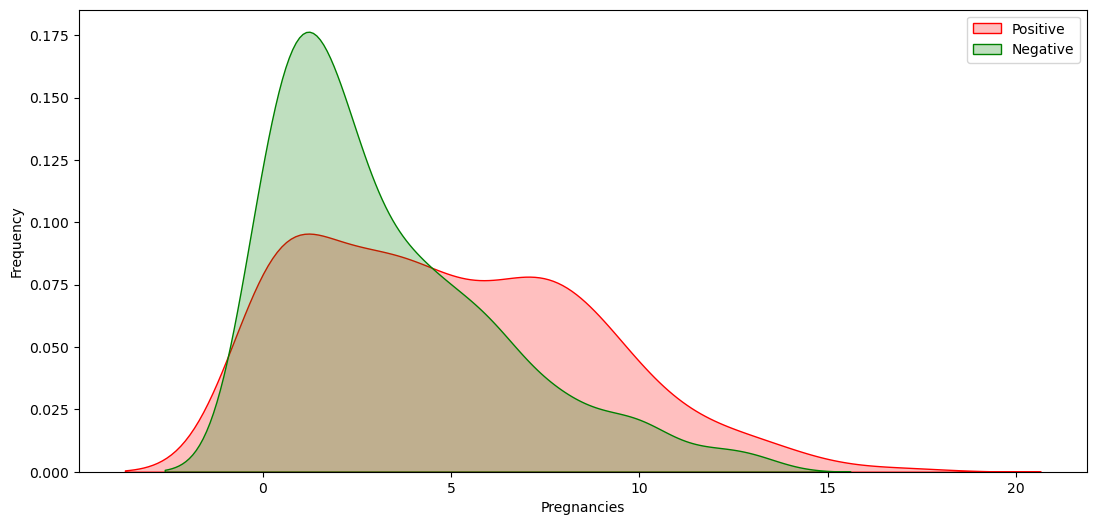

In [35]:
# for analyzing Pregnacies vs Outcome # 1 indicates that person has diabetes and 0 shows the person has no diabetes.
plt.figure(figsize=(13,6))
d = sns.kdeplot(diabetes_df["Pregnancies"][diabetes_df["Outcome"] == 1],
color="Red", shade = True)
d = sns.kdeplot(diabetes_df["Pregnancies"][diabetes_df["Outcome"] == 0],
ax =d, color="Green", shade= True)
d.set_xlabel("Pregnancies")
d.set_ylabel("Frequency")
d.legend(["Positive","Negative"])


C:\Users\Subhashini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

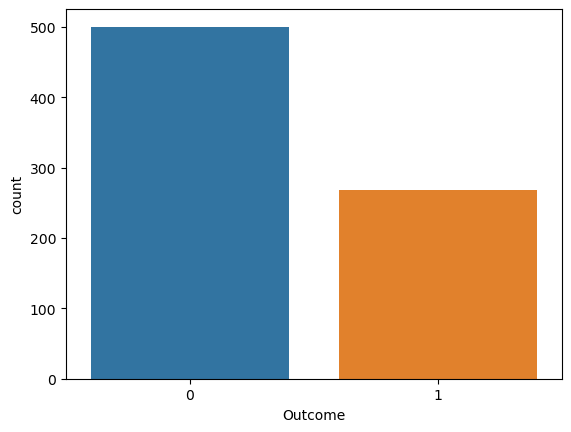

In [36]:
# Bar chart to know count of pregnancy or not
sns.countplot('Outcome', data=diabetes_df)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [32]:
min_glucose = diabetes_df['Glucose'].min()
print(min_glucose)
max_glucose = diabetes_df['Glucose'].max()
print(max_glucose)
min_BloodPressure = diabetes_df['BloodPressure'].min()
print(min_BloodPressure)
max_BloodPressure = diabetes_df['BloodPressure'].max()
print(max_BloodPressure)

44.0
199.0
24.0
122.0


In [33]:
print(diabetes_df.to_string())

     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin        BMI  DiabetesPedigreeFunction  Age  Outcome
0              6  148.000000      72.000000      35.000000   79.799479  33.600000                     0.627   50        1
1              1   85.000000      66.000000      29.000000   79.799479  26.600000                     0.351   31        0
2              8  183.000000      64.000000      20.536458   79.799479  23.300000                     0.672   32        1
3              1   89.000000      66.000000      23.000000   94.000000  28.100000                     0.167   21        0
4              0  137.000000      40.000000      35.000000  168.000000  43.100000                     2.288   33        1
5              5  116.000000      74.000000      20.536458   79.799479  25.600000                     0.201   30        0
6              3   78.000000      50.000000      32.000000   88.000000  31.000000                     0.248   26        1
7             10  115.00

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
Ans:I did not! My dataset had no missing data.

2. Did the process of cleaning your data give you new insights into your dataset?
Ans: Yes, I did. To start, I looked at the number of people who had diabetes or did not.
Later I learnt that if diabetics are treated, there is a potential for healthy pregnancies; otherwise, there would be an increase in other parameters, such as BMI, Insulin, and Glucose; thirdly, we discovered the outliners.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
Asn: Yes, based on my data, there was nothing that could be dropped out that wasn't necessary, therefore I used every column to its most extent to provide the desired results.
